## Modern Portfolio Theory

A single stock is quite unpredictable
we do not know for certain

but we may combine several stocks in order to reduce the risks as much as possible

Diversification


The model has some assumptions
1. The returns are normally distributed 
- we need the mean u 
- the variance
2. Investors are risk averse investors will take on more risk if they are 
expecting more reward

Within modern portfolio theory investors can construct optimal portfolios
offering the max possible expected return for a given level fo risk

Investors are NOT allowed to set short positions

So 100% of wealth is divided among stocks with relative weight = 1

<img src="images/modern_port_1.png" />


# BUT WE USE THE NATURAL LOGARITHM TO CALCULATE

<img src="images/modern_port_2.png"/>

#### The model heavily relies on historical data

<img src="images/modern_port_3.png" />

The risk has do with volality and the covariance and variance
1. variance is the diagonal
2. co-variance is the off diagonal values

<img src="images/modern_port_4.png" />

### Sharpe Raio

It is the most import risk/return measure used in finance 
describtes how much excess return you are recieving for extra volality that you endure holding a risker asset 

S(x) = rx - Rf / stdDev(x)

rx - average rate of return of investment x
Rf = rate of return of risk free security

Sharpe ratio of > 1 is considered to be good


### Capital Allocation Line

From the y intercept of risk free asset intersects with the sharpe ratio curve

In [18]:
import numpy as np
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import scipy.optimize as optimization

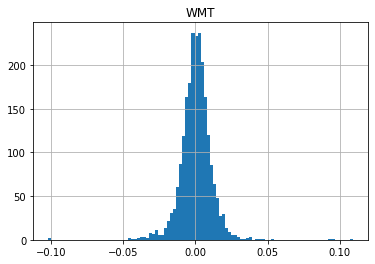

In [5]:
stocks = ['WMT']
start_date = '01/01/2010'
end_date = '01/01/2019'

data = web.DataReader(stocks, data_source='yahoo',start=start_date, end=end_date)['Adj Close']
daily_returns = (data/data.shift(1))-1
daily_returns.hist(bins=100)
plt.show()

In [6]:
import datetime
import scipy.optimize as sco

In [7]:
stocks = ['AAPL','WMT','TSLA','GE','AMZN','DB']
noa = len(stocks)

In [131]:
def download_data(stocks):
    data = web.DataReader(stocks, data_source='yahoo', start=start_date, end=end_date)['Adj Close']
    data.columns = stocks
    return data

def show_data(data):
    data.plot(figsize=(10,5))
    plt.show()
    
def calculate_returns(data):
    returns = np.log(data/data.shift(1))
    return returns

def plot_daily_returns(returns):
    returns.plot(figsize=(10,5))
    plt.show()

def initalize_weights():
    np.random.seed(42)
    weights = np.random.random(len(stocks))
    return weights

def calculate_portfolio_return(returns, weights):
    portfolio_return = np.sum(returns.mean()*weights)*252
    return portfolio_return

def calculate_portfolio_variance(returns, weights):
    portfolio_variance = np.sqrt(np.dot(weights.T, np.dot(returns.cov()*252,weights)))
    return portfolio_variance

def generate_portfolios(weights, returns, iterations=1000):
    preturns = []
    pvariances = []
    
    for i in range(iterations):
        weights = np.random.random(noa)
        weights/=np.sum(weights)
        preturns.append(np.sum(returns.mean()*weights)*252)
        pvariances.append(np.sqrt(np.dot(weights.T,np.dot(returns.cov()*252,weights))))
        
    preturns = np.array(preturns)
    pvariances = np.array(pvariances)
    return preturns, pvariances

def plot_portfolios(returns, variances):
    plt.figure(figsize=(10,6))
    plt.scatter(variances,returns, c=returns/variances,marker='o')
    plt.grid(True)
    plt.xlabel('Expected Volatility')
    plt.ylabel("Expected Return")
    plt.colorbar(label='Sharpe Ratio')
    plt.show()

def statistics(weights, returns):
    portfolio_return = np.sum(returns.mean()*weights)*252
    portfolio_volalility = np.sqrt(np.dot(weights.T,np.dot(returns.cov()*252,weights)))
    return np.array([portfolio_return, portfolio_volalility, portfolio_return/portfolio_volalility])

def min_func_sharpe(weights, returns):
    return -statistics(weights,returns)[2] 

def optimize_portfolio(weights, returns):
    constraints = ({'type':'eq','fun': lambda x: np.sum(x)-1}) #the sum of weights is 1
    bounds = tuple((0,1) for x in range(len(stocks)))
    optimum=optimization.minimize(fun=min_func_sharpe,x0=weights,args=returns,method='SLSQP',bounds=bounds,constraints=constraints) 
    return optimum

def show_optimal_portfolio(optimum, returns, preturns, pvariances):
    plt.figure(figsize=(10,6))
    plt.scatter(pvariances,preturns,c=preturns/pvariances,marker='o')
    plt.grid(True)
    plt.xlabel('Expected Volatility')
    plt.ylabel('Expected Return')
    plt.colorbar(label='Sharpe Ratio')
    plt.plot(statistics(optimum['x'],returns)[1],statistics(optimum['x'],returns)[0],'g*',markersize=20.0)
    plt.show()

### Monte Carlo Approach

Brute force random guessing

<img src="images/modern_port_5.png"/>

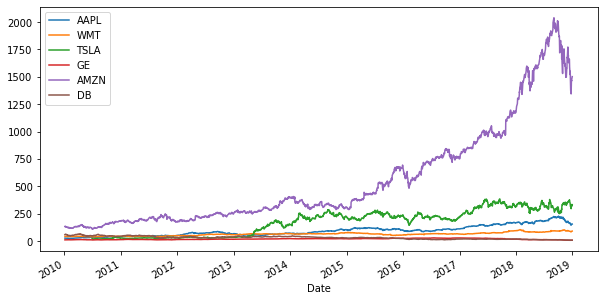

In [133]:
data = download_data(stocks)
show_data(data)

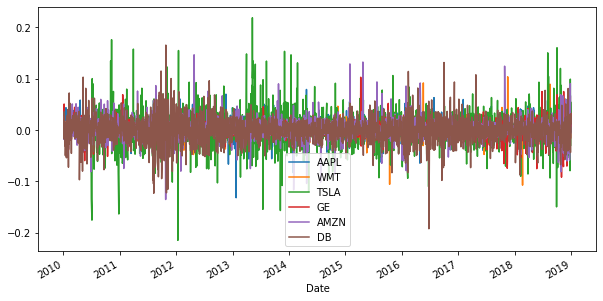

In [134]:
returns = calculate_returns(data)
plot_daily_returns(returns)

In [135]:
weights=initalize_weights()

In [136]:
calculate_portfolio_return(returns,weights)
calculate_portfolio_variance(returns,weights)

0.588318107069794

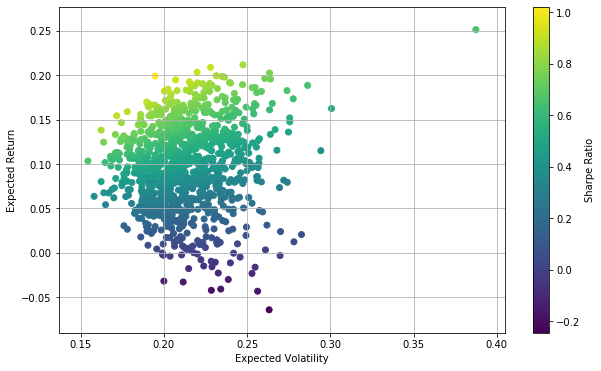

In [137]:
preturns,pvariances=generate_portfolios(weights, returns)
plot_portfolios(preturns,pvariances)

In [138]:
opt=optimize_portfolio(weights,returns)
#"Optimal weights:", 
opt['x'].round(3)

array([0.308, 0.254, 0.113, 0.   , 0.325, 0.   ])

In [139]:
#"Expected return, volatility and Sharpe ratio:", 
statistics(opt['x'].round(3),returns)

array([0.20481444, 0.19543767, 1.04797834])

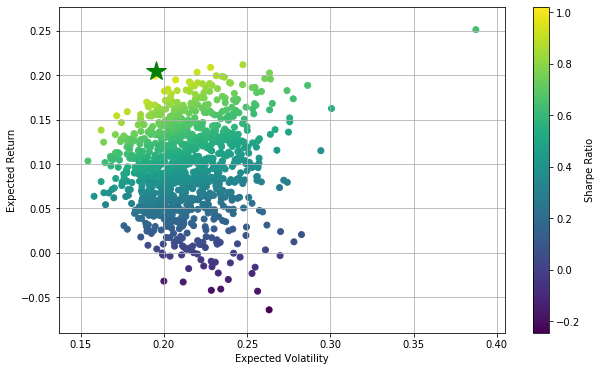

In [140]:
show_optimal_portfolio(opt, returns, preturns, pvariances)
